<a href="https://colab.research.google.com/github/DavidJimenez10/Fundamentos_Analisis_Datos/blob/main/Trabajo_final_Fundamento_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Breast Cancer Wisconsin Data**
Este [dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?datasetId=180&sortBy=voteCount) contiene características de los núcleos celulares presentes en imágenes de una muestra de una masa mamaria, estas características se calcularon para cada imagen:
* Radio (media de las distancias del centro a los puntos del perímetro)
* Textura (desviación estándar de los valores de la escala de grises)
* Perímetro
* Área
* Suavidad (variación local en longitudes de radio)
* Compacidad (perímetro ^ 2 / área - 1.0)
* Concavidad (severidad de las porciones cóncavas del contorno)
* Puntos cóncavos (número de porciones cóncavas del contorno)
* Simetría
* Dimensión fractal ("aproximación a la línea de costa" - 1)

Para cada valor se calculó el promedio, la desviación estandar y el promedio de los 3 valores mas grandes, lo que resultó en 30 características.

La variable objetivo es Diagnosis, toma dos valores M = Maligno, B = Benigno


In [ ]:
###IMPORTAR LIBRERIAS
#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

#Procesado y modelado de datos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix

#Advertencias
import warnings
warnings.filterwarnings('ignore') 


In [ ]:
#Configuración de graficos
plt.rcParams['figure.figsize'] =(20,15)
plt.style.use('ggplot')

In [ ]:
#Importando los datos
datos = pd.read_csv('/content/data.csv')

##**EXPLORAR LOS DATOS**

In [ ]:
##EXPLORAR LOS DATOS
datos.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
datos.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Al hacer un análisis inicial de los datos se observa que no hay valores nulos y la mayoría de datos ya son tipo float64. Además, solo se tiene una variable categórica que es diagnosis, la variable objetivo. Las columnas 'Unnamed: 32' y 'id' se eliminan pues no poseen datos relevantes para el análisis.

In [ ]:
datos = datos.drop(columns =['Unnamed: 32','id'])

## Análisis Datos

### Descripción datos

In [ ]:
datos.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Al analizar datos se observa que estos no estan en los mismos rangos, asi que se decide normalizar. La normalizacion utilizada es: 
$$ X_{norm} = \frac {X_{i} μ}{σ} $$



In [ ]:
def mean_norm(df_input):
  """
  Funciona para normalizar
  Parametro:
    df_input : dataframe que se quiere normalizar
  """
  return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

### Distribucion tipo tumor

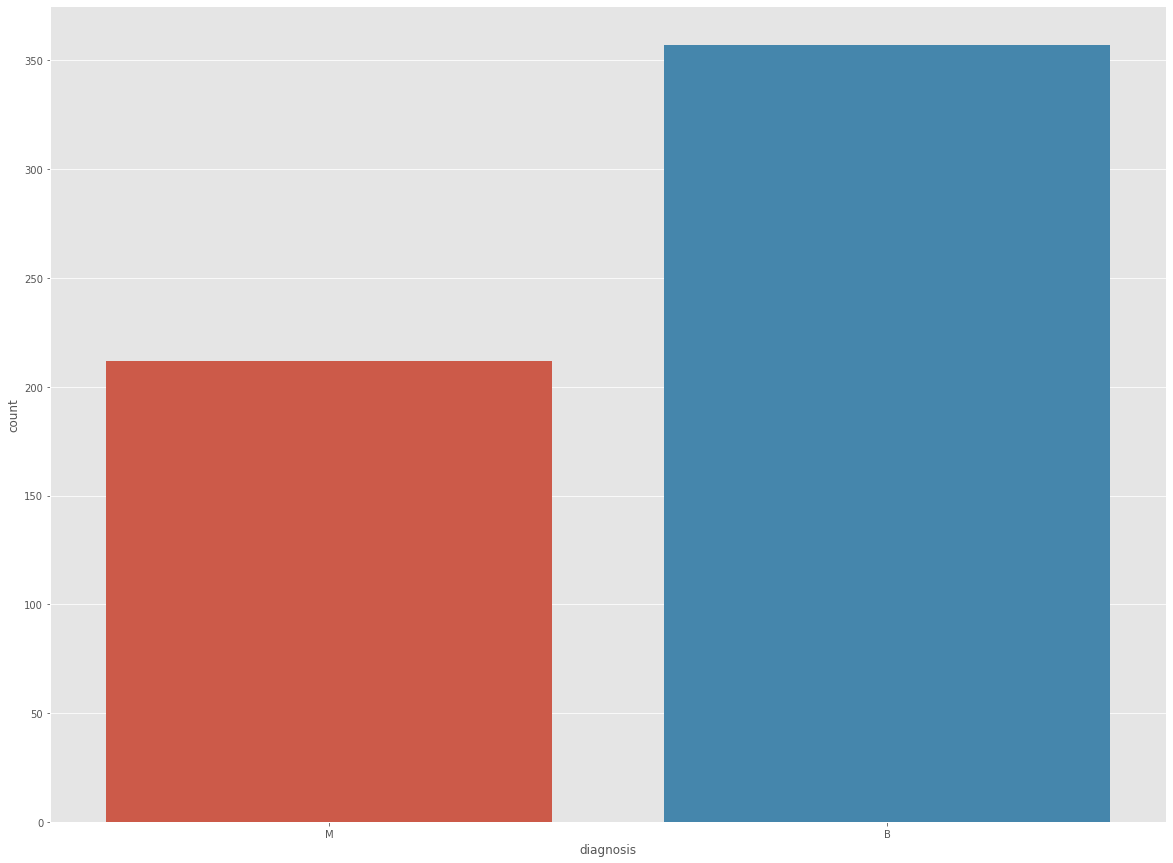

In [ ]:
sb.countplot(datos['diagnosis']) 

### Balanceo Datos

In [ ]:
#BALANCEANDO LOS DATOS
class_benigno,class_maligno = datos.diagnosis.value_counts()
c_benigno = datos[datos['diagnosis'] == 'B']
c_maligno = datos[datos['diagnosis'] == 'M']
c_benigno = c_benigno.sample(class_maligno)

El analizar las etiquetas se encontró que hay mas datos de tumores benignos que malignos. Se decidió balancear los datos para el modelo de árboles de decisión, por recomendación de la documentación el dataset debe tener sus clases balanceadas para evitar sobreajustes hacia una clase

In [ ]:
print(c_benigno.shape)
print(c_maligno.shape)
df_datos_balanceado = pd.concat([c_benigno,c_maligno])
df_datos_balanceado

(212, 31)
(212, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
145,B,11.900,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,...,13.15,16.51,86.26,509.6,0.1424,0.25170,0.09420,0.06042,0.2727,0.10360
524,B,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,...,11.24,22.99,74.32,376.5,0.1419,0.22430,0.08434,0.06528,0.2502,0.09209
497,B,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,14.06,24.34,92.82,607.3,0.1276,0.25060,0.20280,0.10530,0.3035,0.07661
388,B,11.270,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.02757,0.1810,...,12.04,18.93,79.73,450.0,0.1102,0.28090,0.30210,0.08272,0.2157,0.10430
52,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,...,13.10,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.41860,0.65990,0.25420,0.2929,0.09873
564,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115
565,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
566,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.30940,0.34030,0.14180,0.2218,0.07820


In [ ]:
datos = df_datos_balanceado

In [ ]:
#Encoding variable categorica objetivo
y = datos.diagnosis.replace({'M':1,'B':0})
datos = datos.drop(columns='diagnosis')

### Normalización y descripción de los datos

In [ ]:
#Aplicando la funcion de normalizacion
datos_normalizados = mean_norm(datos)

In [ ]:
datos_normalizados.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,...,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02,4.240000e+02
mean,-1.853863e-15,-3.244784e-15,-4.506353e-15,-1.513464e-16,5.651140e-15,-1.402442e-15,-4.398997e-17,3.770569e-17,1.476806e-16,1.759075e-15,...,-9.646372e-16,1.840247e-15,-1.277804e-16,1.906232e-16,1.258427e-15,-6.493757e-16,4.116204e-16,9.353105e-16,-2.427827e-15,-3.834459e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.965511e+00,-2.338942e+00,-1.960551e+00,-1.464095e+00,-2.455744e+00,-1.691376e+00,-1.247303e+00,-1.418411e+00,-2.312583e+00,-1.806526e+00,...,-1.665665e+00,-2.339231e+00,-1.648996e+00,-1.239007e+00,-2.289981e+00,-1.500449e+00,-1.471942e+00,-1.978881e+00,-2.185421e+00,-1.611017e+00
25%,-7.381217e-01,-6.696150e-01,-7.462193e-01,-7.191737e-01,-7.406175e-01,-7.772156e-01,-8.137359e-01,-8.321330e-01,-7.313469e-01,-7.365022e-01,...,-7.783448e-01,-7.120166e-01,-7.847523e-01,-7.323387e-01,-6.778734e-01,-7.218644e-01,-7.915773e-01,-7.783859e-01,-6.494803e-01,-6.990815e-01
50%,-2.279111e-01,-7.259049e-02,-2.132895e-01,-3.123850e-01,-3.304701e-03,-1.417740e-01,-2.113991e-01,-1.517546e-01,-8.931358e-02,-1.550607e-01,...,-2.488537e-01,-3.222237e-02,-2.441892e-01,-3.439220e-01,4.460505e-03,-2.300343e-01,-1.446581e-01,-1.191833e-01,-1.747489e-01,-2.181185e-01
75%,6.819531e-01,5.654063e-01,6.755565e-01,5.627624e-01,6.301835e-01,5.557003e-01,5.696229e-01,7.064779e-01,5.252040e-01,4.942394e-01,...,6.432345e-01,6.872501e-01,6.608001e-01,4.999915e-01,6.246667e-01,5.436837e-01,5.210885e-01,7.829712e-01,3.704986e-01,4.859608e-01
max,3.632660e+00,4.584200e+00,3.629095e+00,4.745567e+00,4.633843e+00,4.191951e+00,3.836040e+00,3.537857e+00,4.426932e+00,4.976482e+00,...,3.713886e+00,3.737214e+00,3.899032e+00,5.340747e+00,3.766402e+00,4.688569e+00,4.384477e+00,2.437048e+00,5.633774e+00,6.411699e+00


### Distribuciones Características

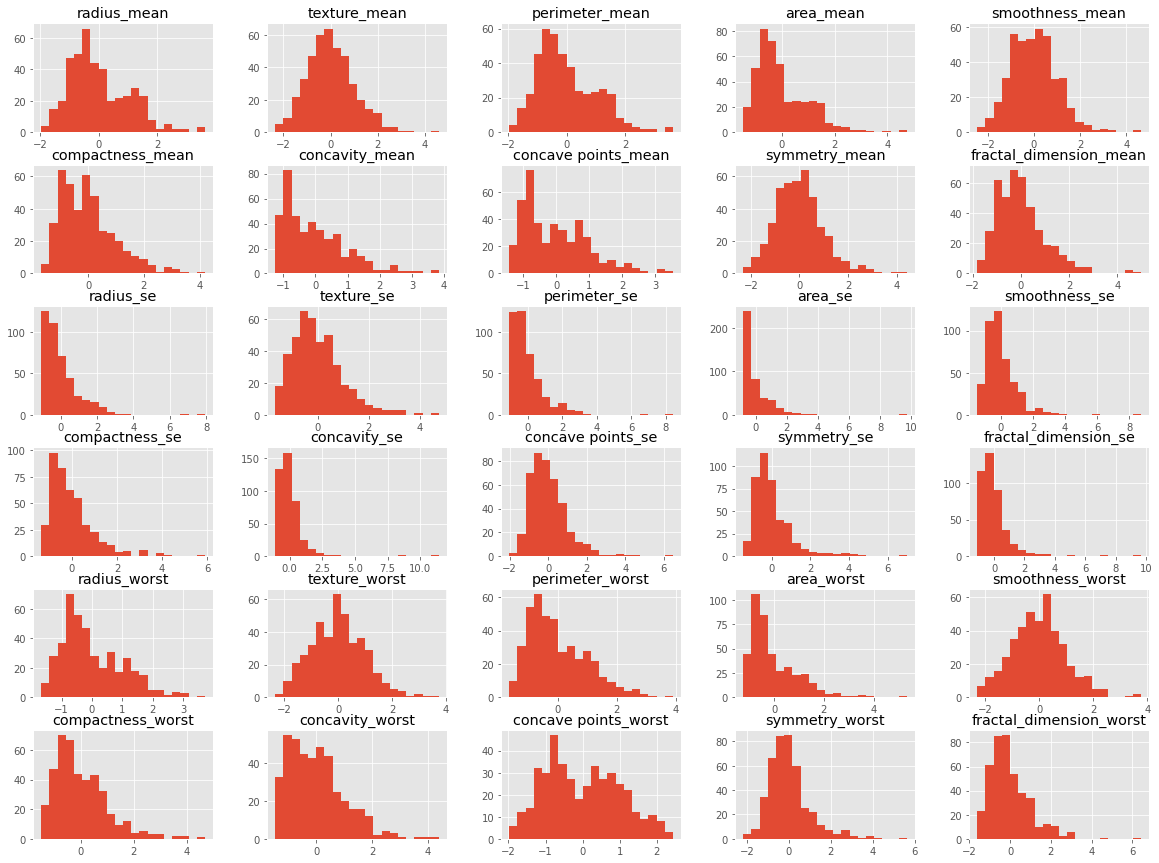

In [ ]:
datos_normalizados.hist(bins=20)
plt.show()

De las distribución de las diferentes características se aprecia que es común, distribuciones con un sesgo hacia la izquierda.

### Análisis Correlación

In [ ]:
datos_normalizados_label = pd.concat([datos_normalizados, y], axis=1)

In [ ]:
matriz_correlacion = datos_normalizados_label.corr()

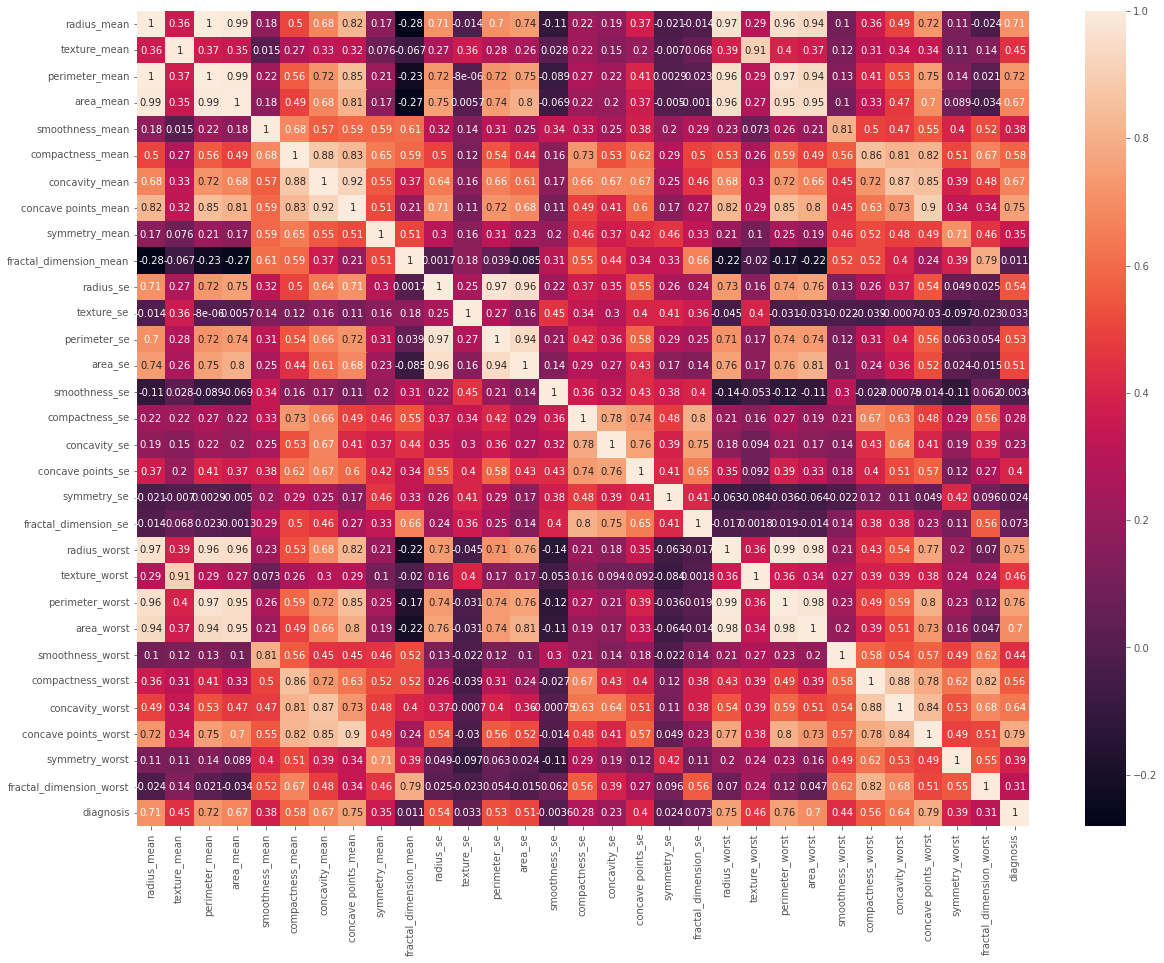

In [ ]:
sb.heatmap(matriz_correlacion, annot = True)

In [ ]:

matriz_correlacion[abs(matriz_correlacion['diagnosis']) > 0.5].index

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'diagnosis'],
      dtype='object')

Haciendo un análisis de correlación de pearson de los datos. Del diagrama de correlación se observan las características con mayor correlación a la variable diagnosis son:

* radius_mean
* perimeter_mean
* area_mean
* compactness_mean
* concavity_mean
* concave points_mean
* radius_se
* perimeter_se
* area_se
* radius_worst
* perimeter_worst
* area_worst
* compactness_worst
* concavity_worst
* concave points_worst

También se observa que algunas de las características previas tienen una correlación directa fuerte (> 0.8) entre ellas, por lo tanto se decide filtrar las variables redundantes:

* **radio_mean, area_mean, perimetro_mean, radio_worst,perimetro_worst,area_worst** tiene correlación lineal mayor 0.94. **Radio_worst** tiene la mayor correlación con el diagnosis asi que nos quedamos con esa.

* **concave_point_worst/mean, concavity_worts/mean, compactness_worst/mean** tiene correlación mayor o igual a 0.75
Dejamos a **concave_points_worst** tiene la mayor correlación con el diagnosis asi que nos quedamos con esa

* **radius_se, perimeter_se, area_se** tiene correlación por encima de 0.95. **Radio_se** tiene la mayor correlación con el diagnosis asi que nos quedamos con esa


Para las variables radio, perímetro y área la dependencia lineal es debida a su relación geometrica, es decir, el perímetro y área se calculan con base en el radio.

De las características tipo mean y tipo worst se tienen una dependencia lineal fuerte, dado que el conjunto worst esta contenido en el conjunto mean, aunque sean valores "atipicos"

In [ ]:
X = datos_normalizados[['radius_worst','concave points_worst','radius_se']]
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(X, y, train_size=0.7,random_state= 123)

### Grafico 3D, Distribución Características Seleccionadas

In [ ]:
fig = px.scatter_3d(X, x='radius_se', y='radius_worst', z='concave points_worst',
              color=y.replace({1:'M',0:'B'}))

fig.update_traces(marker=dict(size=2),
                  selector=dict(mode='markers'))

fig.show()


Se observa que al graficar las 3 características y las dos clases de tumores, los datos tienen frontera visible por la que podrían ser separados

### Boxplot

In [ ]:
data = pd.concat([y,X],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
data.head()

,diagnosis,features,value
0,0,radius_worst,-0.833976
1,0,radius_worst,-1.213461
2,0,radius_worst,-0.653174
3,0,radius_worst,-1.054515
4,0,radius_worst,-0.843910


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

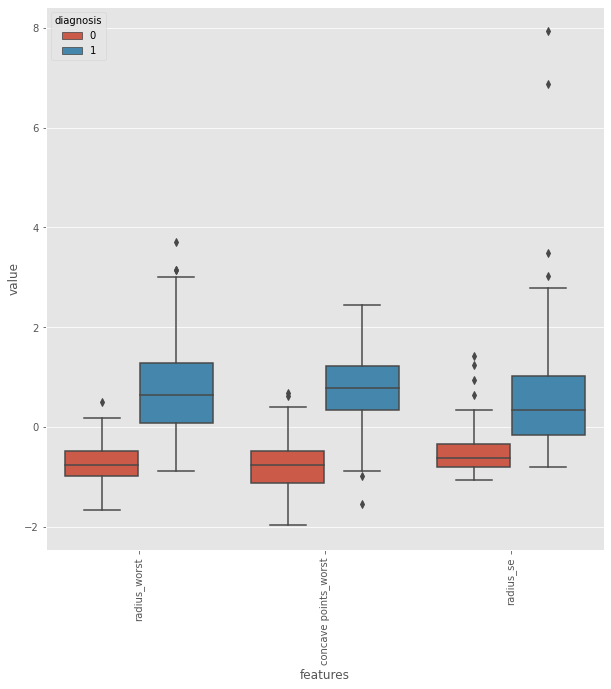

In [ ]:
plt.figure(figsize=(10,10))
sb.boxplot(x='features', y='value', hue='diagnosis',data=data)
plt.xticks(rotation=90)


Al graficar los boxplot se pueden observar gran cantidad de datos benignos con valores atípicos en **Radius_se**, la presencia de estos datos podría introducir ruido en la predicción ocacionando que no se pueda clasificar correctamente el tipo de tumor en algunos casos. Por lo demás las variables discriminan el tipo de tumor correctamente.

## Modelado
### Regresion Logistica

In [ ]:
### Regresion logistica
modelo = LogisticRegression()
modelo.fit(xEntrenamiento, yEntrenamiento)

LogisticRegression()

In [ ]:
print('Intercepto',modelo.intercept_)
print('Coeficiente:', list(zip(X.columns, modelo.coef_.flatten())))
print('Desempeño en Entrenamiento', modelo.score(xEntrenamiento,yEntrenamiento))

Intercepto [0.78959068]
Coeficiente: [('radius_worst', 2.887741502250706), ('concave points_worst', 2.5859789870462593), ('radius_se', 0.6333454468818674)]
Desempeño en Entrenamiento 0.9425675675675675


De los pesos encontrados en el entrenamiento para cada variable, vemos que para la caracteristica **Radius_se** tiene un menor peso en la predicción, recordemos esta tiene mayor cantidad de valores atípicos para los tumores benignos, creemos que esta variables genera un mayor error en el entrenamiento por lo cual el modelo minimiza su peso.

In [ ]:
###EVALUAR EL MODELO
predicciones = modelo.predict(xPrueba)

Para este problema es muy importante minimizar el valor de **falsos negativos** en la matriz de confusión, ya que podría ser mortal no predecir correctamente el caso de paciente con un tumor maligno (diagnosis = 1)

In [ ]:
prediccion = modelo.predict(xEntrenamiento)
#Matriz de confusión en entrenamiento
print('Matriz de Confusión')
print('-------------------')
confusion_matrix(y_true = yEntrenamiento,
                 y_pred = prediccion)

Matriz de Confusión
-------------------


array([[138,  10],
       [  7, 141]])

In [ ]:
print(f'Desempeño en prueba {modelo.score(xPrueba,yPrueba)*100} %')

Desempeño en prueba 96.09375 %


In [ ]:
prediccionPrueba = modelo.predict(xPrueba)

#Matriz de confusión en entrenamiento

print('Matriz de Confusión')
print('-------------------')
confusion_matrix(y_true = yPrueba,
                 y_pred = prediccionPrueba)

Matriz de Confusión
-------------------


array([[63,  1],
       [ 4, 60]])

Aunque el desempeño de los modelos en prueba y entrenamiento son altos. Analizando la matriz de confusión, en la segunda diagonal, hay un mayor numero de predicciones falsas negativas, lo cual es crítico mejorar para evitar muertes por tumores malignos, y empezar su correcto tratamiento a tiempo.

###MODELADO

## Árbol de Decision



In [ ]:
labels = xEntrenamiento.columns
labels

Index(['radius_worst', 'concave points_worst', 'radius_se'], dtype='object')

In [ ]:
###Profundidad 5
modelo = DecisionTreeClassifier(max_depth=5,
                                criterion='gini',
                                random_state=123)

In [ ]:
modelo.fit(xEntrenamiento, yEntrenamiento)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Númrto de nodos terminales: 15


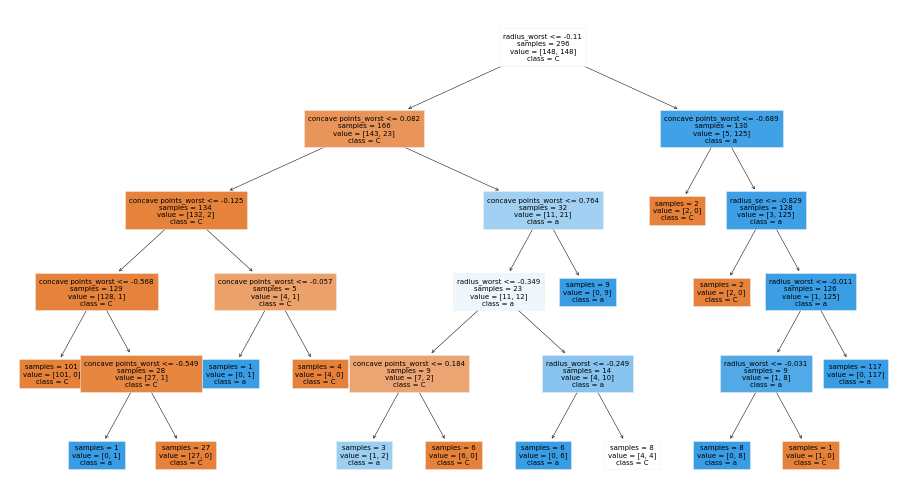

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Númrto de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo,
                 feature_names= labels.tolist(),
                 class_names='CaracteristicasTumor',
                 filled=True,
                 impurity=False,
                 fontsize=7,
                 ax=ax)

In [ ]:
###EVALUAR EL MODELO

predicciones = modelo.predict(xPrueba)

#Matriz de confución en entrenamiento

print('Matriz de Confusión')
print('-------------------')
confusion_matrix(y_true = yEntrenamiento,
                 y_pred = modelo.predict(xEntrenamiento))

Matriz de Confusión
-------------------


array([[147,   1],
       [  4, 144]])

In [ ]:
#Desempeño en entrenamiento
accuracyEnt = accuracy_score(y_true = yEntrenamiento, y_pred=modelo.predict(xEntrenamiento))

print(f'El desempeño en entrenamiento es: {100 * accuracyEnt} %')

El desempeño en entrenamiento es: 98.3108108108108 %


In [ ]:
#Matriz de confución en Prueba

print('Matriz de Confusión')
print('-------------------')
confusion_matrix(y_true = yPrueba,
                 y_pred = modelo.predict(xPrueba))

Matriz de Confusión
-------------------


array([[60,  4],
       [ 8, 56]])

In [ ]:
#Desempeño en prueba
accuracyPru = accuracy_score(y_true = yPrueba, y_pred=modelo.predict(xPrueba))

print(f'El desempeño en prueba es: {100 * accuracyPru} %')

El desempeño en prueba es: 90.625 %


ÁRBOL DE DECISIÓN profundidad 7

In [ ]:
###MODELAR LOS DATOS
modelo = DecisionTreeClassifier(max_depth=7,
                                criterion='gini',
                                random_state=123)

In [ ]:
modelo.fit(xEntrenamiento, yEntrenamiento)

DecisionTreeClassifier(max_depth=7, random_state=123)

Profundidad del árbol: 7
Númrto de nodos terminales: 18


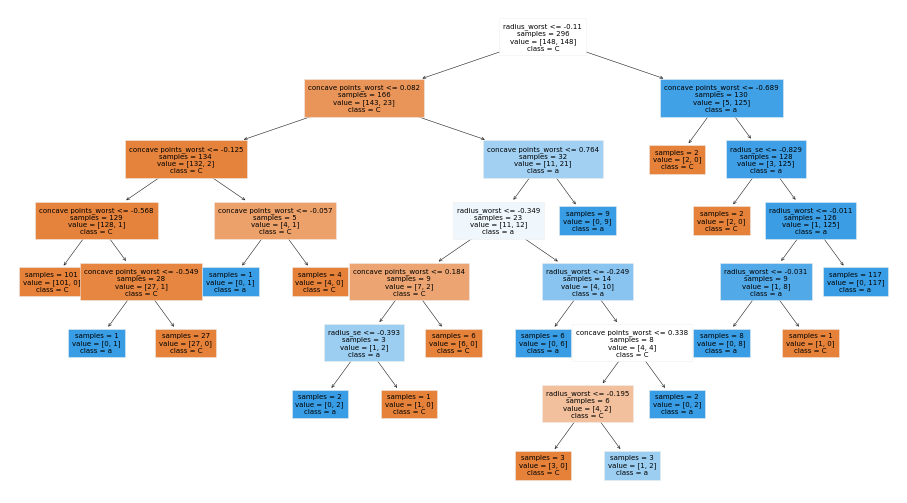

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Númrto de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo,
                 feature_names= labels.tolist(),
                 class_names='CaracteristicasTumor',
                 filled=True,
                 impurity=False,
                 fontsize=7,
                 ax=ax)

In [ ]:
###EVALUAR EL MODELO

predicciones = modelo.predict(xPrueba)

#Matriz de confución en entrenamiento

print('Matriz de Confusión')
print('-------------------')
confusion_matrix(y_true = yEntrenamiento,
                 y_pred = modelo.predict(xEntrenamiento))

Matriz de Confusión
-------------------


array([[147,   1],
       [  0, 148]])

In [ ]:
#Desempeño en entrenamiento
accuracyEnt = accuracy_score(y_true = yEntrenamiento, y_pred=modelo.predict(xEntrenamiento))

print(f'El desempeño en entrenamiento es: {100 * accuracyEnt} %')

El desempeño en entrenamiento es: 99.66216216216216 %


In [ ]:
#Matriz de confusión en Prueba

print('Matriz de Confusión')
print('-------------------')
confusion_matrix(y_true = yPrueba,
                 y_pred = modelo.predict(xPrueba))

Matriz de Confusión
-------------------


array([[60,  4],
       [ 6, 58]])

In [ ]:
#Desempeño en prueba
accuracyPru = accuracy_score(y_true = yPrueba, y_pred=modelo.predict(xPrueba))

print(f'El desempeño en prueba es: {100 * accuracyPru} %')

El desempeño en prueba es: 92.1875 %


###Conclusiones (Árbol de decisión)

* Se realizaron entrenamiento y pruebas con 5 y 7 niveles de profundidad obteniendo resultados en prueba bastante similares entre los dos del 93%. 
* Al aumentar el nivel de profundidad el modelo tiende a sobreajustarse a los datos en el entrenamiento, sin embargo en la predicción con los datos de prueba no logra presentar el mismo desempeño 
* En el entrenamiento se logra observar que la cantidad de falsos negativos es considerablemente bajo, pero al momento de hacer la prueba se aumenta el numero de falsos negativos lo cual podría ser un punto crítico a la hora de escoger este modelo ya que en el modelo de regresión logística se presentaron menos falsos positivos a la hora de realizar la predicción 